## Curves, Surfaces, and their Curvatures

There is a natural linear transformation on the tangent plane of a surface whose eigenvalues yield the curvatures at the point.

### Space Curves

A space curve is a smooth mapping of a real interval $[a,b]$ into $\maR^3$. For example, 

\begin{equation}\label{eq:g}
  \gamma(t)\equiv (r\cos(t/c), r\sin(t/c), ht/c) 
\end{equation}

describes a helix as $t$ moves through $\maR$. Its **tangent vector**

\begin{equation}\label{eq:gp}
  \gamma'(t)=(-r\sin(t/c), r\cos(t/c), h)/c
\end{equation}

has length 
$\|\gamma'(t)\|=\sqrt{r^2+h^2}/c$ and so with $c=\sqrt{r^2+h^2}$ we say $\gamma$ has unit speed. In this case we define the **curvature vector**

\begin{equation}\label{eq:gpp}
  \gamma''(t) = \|(-r\cos(t/c), -r\sin(t/c), 0)/c^2\| = r/c^2 = \frac{r}{r^2+h^2}
\end{equation}

and the **curvature** to be its magnitude

\begin{equation}\label{eq:kappa}
  \kappa \equiv \|\gamma''(t)\| = \frac{r}{r^2+h^2}
\end{equation}

We complete the frame with **binormal vector**

\begin{equation}\label{eq:bin}
    B(t)\equiv \gamma'(t)\times\gamma''(t)/\kappa = (h\sin(t/c), -h\cos(t/c), r)/c
\end{equation}

and note that its derivative

\begin{equation}\label{eq:binp}
    B'(t) = (h\cos(t/c), h\sin(t/c), 0)/c^2
\end{equation}

is proportional to $\gamma''(t)/\kappa$. In particular $B'(t)=-\tau\gamma''(t)/\kappa$ where

\begin{equation}\label{eq:torsion}
    \tau = \frac{h}{r^2+h^2}
\end{equation}

is the **torsion** of $\gamma$.

Note that $\gamma(0)=(r,0,0)$, $\gamma'(0)=(0,r,h)/c$, and $\gamma''(0)=(-r,0,0)/c^2$ and $B'(0)=(h,0,0)/c^2$

In [41]:
# helix widget

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
t = np.linspace(-30,30,1001)
fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

r = 1
h = 1
c = np.sqrt(r*r+h*h)
helix, = ax.plot3D(r*np.cos(t/c), r*np.sin(t/c), h*t/c, 'b') 
gp, = ax.plot3D([r, r], [0, r/c], [0, h/c], 'r')
g2p, = ax.plot3D([r, r-r/c/c], [0, 0], [0, 0], 'g')
tau, = ax.plot3D([r, r+h/c/c], [0, 0], [0, 0], 'm')

ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([-10,10])

rS = widgets.FloatSlider(min=0, max=10, step=0.1, value=1, description='radius: $r$')
hS = widgets.FloatSlider(min=-5, max=5, step=0.1, value=1, description='height: $h$') 

def update( r=rS, h=hS ):
    c = np.sqrt(r*r+h*h)
    helix.set_data_3d(r*np.cos(t/c), r*np.sin(t/c), h*t/c)
    gp.set_data_3d([r, r], [0, r/c], [0, h/c])
    g2p.set_data_3d([r, r-r/c/c], [0, 0], [0, 0])
    tau.set_data_3d([r, r+h/c/c], [0, 0], [0, 0])
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([rS, hS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:helix} A helix with its red tangent and green curvature and magenta torsion at $t=0$. \end{myfig}


## Surfaces

A surface is a smooth mapping of a real rectangle $\{(s,t): a\le s\le b,\,c\le t\le d\}$ into $\maR^3$. For example, 

\begin{equation}\label{eq:g2}
  \gamma(s,t)\equiv (s\cos(t), s\sin(t), ht) 
\end{equation}

for fixed $h$ describes a helicoid as $(s,t)$ moves through $\maR^2$. Its tangent vectors are

\begin{equation*}
  \p_s\gamma(s,t) = (\cos(t), \sin(t), 0) \and \p_t\gamma(s,t) = (-s\sin(t), s\cos(t), h)
\end{equation*}

and its unit normal is

\begin{equation*}
  n(\gamma(s,t)) = \frac{\p_s\gamma(s,t) \times \p_t\gamma(s,t)}{\|\p_s\gamma(s,t) \times \p_t\gamma(s,t)\|}
    = \frac{(h\sin(t), -h\cos(t), s)}{\sqrt{s^2+h^2}} 
\end{equation*}

We have illustrated each of these objects in Figure \ref{fig:helicoid} below.


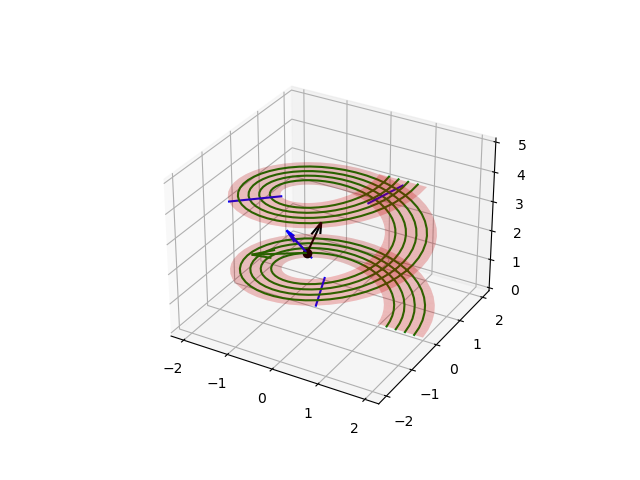

In [42]:
# helicoid graph

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
fig = plt.figure(' ') 
ax = plt.axes(projection="3d")    # set up for 3D work

# build the surface
r = np.linspace(1,2,100)
t = np.linspace(0,4*np.pi,100)
R, T = np.meshgrid(r, t)   
h = 0.4 
Zc = h*T
Xc = R*np.cos(T)
Yc = R*np.sin(T)
ax.plot_surface(Xc, Yc, Zc, alpha = 0.25, color='r')

# plot the the mesh of curves
for n in range(1,5):
    ax.plot3D(Xc[n*20,:],Yc[n*20,:],Zc[n*20,:],'b')
    ax.plot3D(Xc[:,n*20],Yc[:,n*20],Zc[:,n*20],'g')
    
# plot tangents and normal
ax.plot3D(Xc[20,20], Yc[20,20], Zc[20,20],'ko')

fx = np.array([np.cos(T[20,20]), np.sin(T[20,20]), 0])
fy = np.array([-R[20,20]*np.sin(T[20,20]), R[20,20]*np.cos(T[20,20]), h])
fz = np.array([h*np.sin(T[20,20]), -h*np.cos(T[20,20]), R[20,20]])/np.sqrt(h**2+R[20,20]**2)

ax.quiver([Xc[20,20],Xc[20,20],Xc[20,20]], [Yc[20,20],Yc[20,20],Yc[20,20]], [Zc[20,20],Zc[20,20],Zc[20,20]],
           [fx[0],fy[0],fz[0]], [fx[1],fy[1],fz[1]], [fx[2],fy[2],fz[2]], colors=['b','g','k','b','b','g','g','k','k'], 
          arrow_length_ratio=.4)


plt.show()

\begin{myfig}\label{fig:helicoid} A pink helicoid from the rectangle $\{(s,t);1\le s\le 2,\, 0\le t\le 4\pi\}$ with $h=0.4$. We have also plotted the four blue curves, $s\mapsto\gamma(s,4n\pi/5)$ and 4 green curves,
$t\mapsto\gamma(1+n/5,t)$, where $n=1,2,3,4$. We have placed a black dot at their intersection when $n=1$ and
plotted there its blue tangent vector, $\p_s\gamma(6/5,4\pi/5)$, its
green tangent vector, $\p_t\gamma(6/5,4\pi/5)$, and its black normal vector $n(\gamma(6/5,4\pi/5))$.
\end{myfig}

We note that both $\p_s\gamma(s,t)$ and $\p_t\gamma(s,t)$ are tangent to $\cM$ at $\gamma(s,t)$. Hence each are perpendicular to the normal vector $n(\gamma(s,t))$. That is


\begin{equation*}
  \p_s\gamma(s,t)^Tn(\gamma(s,t)) = 0 \and \p_t\gamma(s,t)^Tn(\gamma(s,t)) = 0
\end{equation*}

As these hold for all $(s,t)$ we may differentiate, say the first wrt $s$ 

\begin{equation*}
  \p_{ss}\gamma(s,t)^Tn(\gamma(s,t)) + \p_s\gamma(s,t)^T\p_s n(\gamma(s,t)) = 0
\end{equation*}

Now the first term is $\kappa_s(\gamma(s,t))\cos(\theta)$ while applying the chain rule to the second brings

\begin{equation*}
  \kappa_s(\gamma(s,t))\cos(\theta) = -\p_s\gamma(s,t)^T\nabla n(\gamma(s,t))\p_s\gamma(s,t)
\end{equation*}

The simplest surface is just the graph of a function above some planar domain, $D$. That is,

\begin{equation}\label{eq:cM}
  \cM \equiv \{(x_1,x_2,f(x_1,x_2)):(x_1,x_2)\in D\}
\end{equation}

We achieve tangent vectors by differentiating in the coordinate directions

\begin{equation}\label{eq:cMtan}
   t_1(x_1,x_2) = (1,0,f_{x_1}(x_1,x_2)) \and t_2(x_1,x_2) = (0,1,f_{x_2}(x_1,x_2))
\end{equation}

and their unit normal via the cross product

\begin{equation}\label{eq:cMperp}
  n \equiv \frac{t_1\times t_2}{\|t_1\times t_2\|} = \frac{(-f_{x_1},-f_{x_2}, 1)}{(1+f_{x_1}^2+f_{x_2}^2)^{1/2}}
\end{equation}

A general tangent vector is $v=a_1t_1+a_2t_2$, let $\alpha$ be a curve on $\cM$ where $\alpha(0)=p$ and $\alpha'(0)=v$ then the Shape operator at $p$ applied to $v$ is

\begin{equation}\label{eq:Shape}
  S_pv \equiv -\nabla_v n(p) = \lim_{h\to 0}\frac{n(\alpha(h))-n(p)}{h}
\end{equation}

where

\begin{equation}\label{eq:ddir}
  \eqalign{ \nabla_{t_1} n(y) 
  &= \lim_{h\to 0}\frac{n(y+ht_1)-n(y)}{h} \cr
  &= \lim_{h\to 0}\frac{(-f_{x_1}(x_1+h,x_2,f(x_1,x_2)+hf_{x_1}(x_1,x_2))-(-f_{x_1}(x_1,x_2),-f_{x_1}(x_1,x_2),1}{h} }
\end{equation}

If we specialize to $p=0$ and assume $f(0,0)=f_{x_1}(0,0)=f_{x_2}(0,0)=0$ we find

\begin{equation}\label{eq:n12}
  \eqalign{
  \nabla_{t_1}n(0) &= n_{x_1}(0) =  (-f_{x_1x_1},-f_{x_1x_2}, 0) = -f_{x_1x_1}t_1 - f_{x_1x_2}t_2  \cr
  \nabla_{t_2}n(0) &= n_{x_2}(0) =  (-f_{x_2x_1},-f_{x_2x_2}, 0) = -f_{x_2x_1}t_1 - f_{x_2x_2}t_2}
\end{equation}

so 

\begin{equation}\label{eq:ShM0}
  S(0) = \begin{pmatrix} f_{x_1x_1}(0,0) & f_{x_1x_2}(0,0) \\ f_{x_1x_2}(0,0) & f_{x_2x_2}(0,0) \end{pmatrix}
\end{equation}